# IMPORTING ALL NECESSARY LIBRARIES AND FUNCTIONS

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score, StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
from google.colab import files
from glob import glob
import random
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

from keras import optimizers
from google.colab import files

# CHECKING IF THE GPU IS WORKING 

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# IMPORTING THE DATASET FROM GOOGLE DRIVE 

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

train_path='/content/drive/MyDrive/train_dataset'
test_path='/content/drive/MyDrive/test_dataset'

train_datagen=ImageDataGenerator(rescale=1./255,shear_range=.2, zoom_range=.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')
testing_set=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Found 4589 images belonging to 2 classes.
Found 2160 images belonging to 2 classes.


# AlexNet MODEL
### MAKING, COMPILATION, STRUCTURE, FITTING, PROGRESS VISUALIZATION AND HEATMAP

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


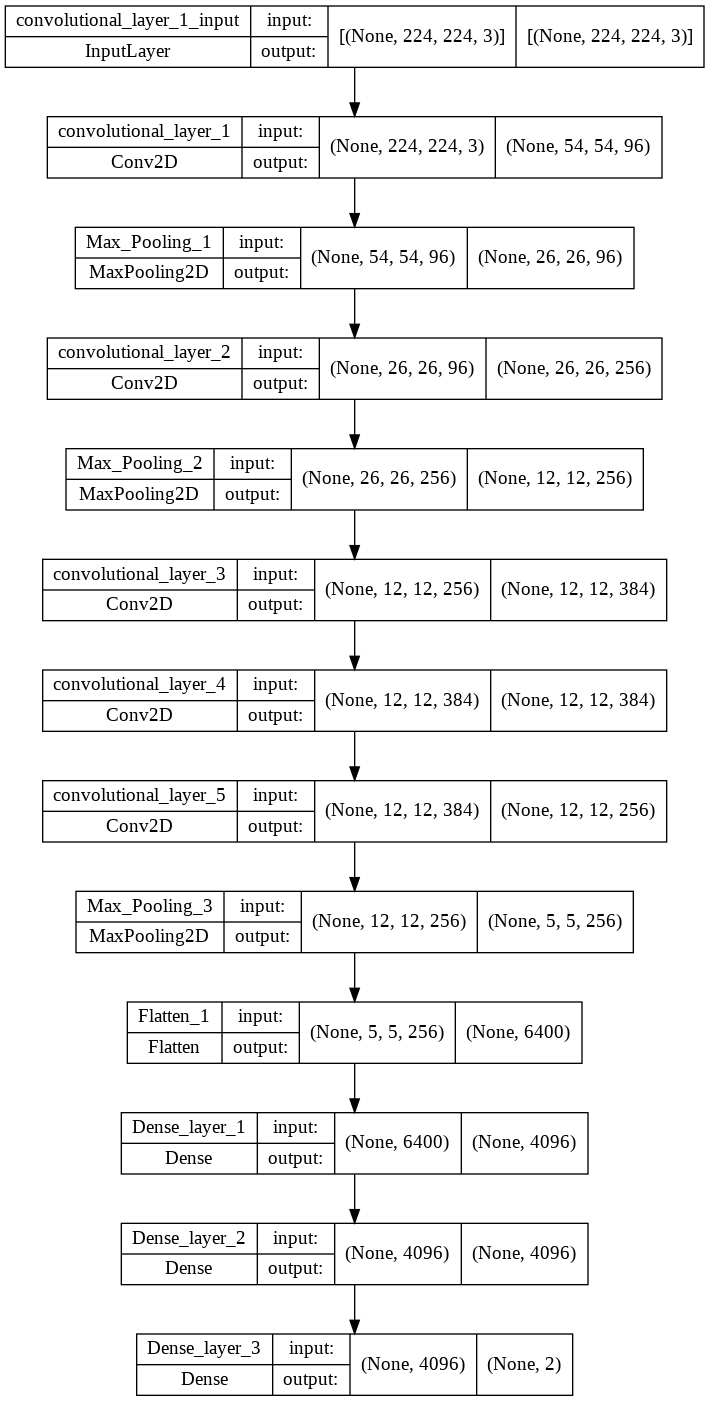

In [4]:
model1=Sequential()

# layer 1: convolutional
model1.add(Conv2D(filters=96,kernel_size=11,strides=4,activation="relu",input_shape=(224,224,3),name='convolutional_layer_1'))

# MaxPool 1
model1.add(MaxPool2D(pool_size=3,strides=2,name='Max_Pooling_1'))

# layer 2: convolutional
model1.add(Conv2D(filters=256,kernel_size=5,strides=1,activation="relu",padding='same',name='convolutional_layer_2'))

# MaxPool 2
model1.add(MaxPool2D(pool_size=3,strides=2,name='Max_Pooling_2'))

# layer 3: convolutional
model1.add(Conv2D(filters=384,kernel_size=3,strides=1,activation="relu",padding='same',name='convolutional_layer_3'))

# layer 4: convolutional
model1.add(Conv2D(filters=384,kernel_size=3,strides=1,activation="relu",padding='same',name='convolutional_layer_4'))

# layer 5: convolutional
model1.add(Conv2D(filters=256,kernel_size=3,strides=1,activation="relu",padding='same',name='convolutional_layer_5'))

# MaxPool 3
model1.add(MaxPool2D(pool_size=3,strides=2,name='Max_Pooling_3'))

# Flatten
model1.add(Flatten(input_shape=(224,224,3),name='Flatten_1'))

# layer 6: Fully Connected
model1.add(Dense(4096,activation='relu',name='Dense_layer_1'))

# layer 7: Fully Connected
model1.add(Dense(4096,activation='relu',name='Dense_layer_2'))

# layer 8: Fully Connected
model1.add(Dense(2,activation='softmax',name='Dense_layer_3'))

# compiling the model
model1.compile(loss='sparse_categorical_crossentropy',optimizer=tf.optimizers.SGD(lr=.01),metrics=['accuracy'])

# compiling the model
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

# printing the blueprint of the model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [5]:
# fitting the alexnet model
r1=model1.fit_generator(training_set,validation_data=testing_set,epochs=32,steps_per_epoch=(len(training_set)),validation_steps=(len(testing_set)))

# keys present in the history
print(r1.history.keys())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/32
144/144 [==============================] - 194s 1s/step - loss: 0.8451 - accuracy: 0.4844 - val_loss: 0.6938 - val_accuracy: 0.2667
Epoch 2/32
144/144 [==============================] - 176s 1s/step - loss: 0.6952 - accuracy: 0.4925 - val_loss: 0.6940 - val_accuracy: 0.2667
Epoch 3/32
144/144 [==============================] - 177s 1s/step - loss: 0.6926 - accuracy: 0.5038 - val_loss: 0.6860 - val_accuracy: 0.7333
Epoch 4/32
144/144 [==============================] - 172s 1s/step - loss: 0.7016 - accuracy: 0.5123 - val_loss: 0.7076 - val_accuracy: 0.2667
Epoch 5/32
144/144 [==============================] - 170s 1s/step - loss: 0.6933 - accuracy: 0.4899 - val_loss: 0.6940 - val_accuracy: 0.2667
Epoch 6/32
144/144 [==============================] - 171s 1s/step - loss: 0.7123 - accuracy: 0.5228 - val_loss: 0.6798 - val_accuracy: 0.7333
Epoch 7/32
144/144 [==============================] - 170s 1s/step - loss: 0.6848 - accuracy: 0.5330 - val_loss: 0.7137 - val_accuracy: 0.2667

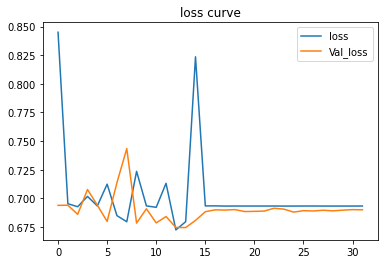

Text(0.5, 1.0, 'Accuracy Evolution')

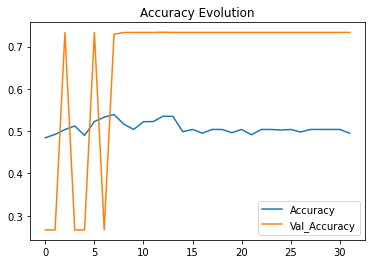

In [6]:
import matplotlib.pyplot as plt

plt.plot(r1.history['loss'],label='loss')
plt.plot(r1.history['val_loss'],label='Val_loss')
plt.title('loss curve')
plt.legend()
plt.show()

plt.plot(r1.history['accuracy'], label='Accuracy')
plt.plot(r1.history['val_accuracy'], label='Val_Accuracy')
plt.title('accuracy curve')
plt.legend()
plt.title('Accuracy Evolution')

In [7]:
evaluation=model1.evaluate(testing_set)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation=model1.evaluate(training_set)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

68/68 [==============================] - 54s 801ms/step - loss: 0.6899 - accuracy: 0.7333
Test Accuracy: 73.33%
144/144 [==============================] - 116s 802ms/step - loss: 0.6931 - accuracy: 0.5040
Train Accuracy: 50.40%
